# Word -> Image search

In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import flatbuffers
import word2vec.Word
import word2vec.Dict

%matplotlib inline

## load data

In [2]:
# deserialize word vectors
with open('../vectors.bin', 'rb') as f:
    buf = f.read()

# check the original image feature -> it seems to be okay!
#with open('../data/nus_images.bin', 'rb') as f:
#    buf = f.read()
    
word_dict = word2vec.Dict.Dict.GetRootAsDict(buf, 0)
vocab = [word_dict.Words(i).Name().decode('utf-8') for i in range(word_dict.WordsLength())]
word_vec = np.vstack([word_dict.Words(i).FeatureAsNumpy() for i in range(word_dict.WordsLength())])
print("word vector: {} x {}".format(*word_vec.shape))

# load linear transform matrix
with h5py.File('../lt_mat.hdf5', mode='r') as h5_file:
    linear_transform = h5_file["linear_transform"].value

print("linear transform matrix: {} x {}".format(*linear_transform.shape))

X_vis = pd.read_hdf("/data/pearl_hdd1/fukui/dataset/NUS/python_data/alexnet_feature.h5")
print("visual features: {} x {}".format(*X_vis.shape))

word vector: 63641 x 300
linear transform matrix: 4096 x 300


/home/fukui/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


visual features: 224000 x 4096


## wrap data

In [ ]:
from word_embed_wrapper import MultimodalWordEmbedWrapper

def identity(X):
    return X

mm_word = MultimodalWordEmbedWrapper(vocab, word_vec @ linear_transform.T, identity)
#mm_word = MultimodalWordEmbedWrapper(vocab, word_vec, identity) # check the original image feature
mm_word.map_image(X_vis)

## word -> word search

In [10]:
mm_word.most_similar(pos_word=['dog'], target='word')

[('dog', 1.0000001192092896),
 ('cane', 0.748608410358429),
 ('hound', 0.6895231008529663),
 ('goat', 0.6540248990058899),
 ('rabbit', 0.6305884718894958),
 ('pet', 0.6124739646911621),
 ('boxer', 0.5923159122467041),
 ('fur', 0.5886921286582947),
 ('cow', 0.5772695541381836),
 ('tongue', 0.5597372651100159)]

## word -> image search

In [4]:
from imageio import imread
import skimage
from glob import glob

def img_id2path(image_id):
    return glob('./images/%s/%s_*.jpg'%(image_id[:2], image_id))[0]

def read_image(image_id, size):
    return skimage.transform.resize(imread(img_id2path(image_id)), size)

[('2335798508', 0.5643035173416138),
 ('124039910', 0.5563904047012329),
 ('484574784', 0.5551451444625854),
 ('1162370931', 0.5542834997177124),
 ('2578040045', 0.5528804063796997),
 ('920673628', 0.550734281539917),
 ('221083026', 0.5498055219650269),
 ('2459051272', 0.5497069358825684),
 ('1045611994', 0.5444291830062866),
 ('409117077', 0.5407507419586182)]

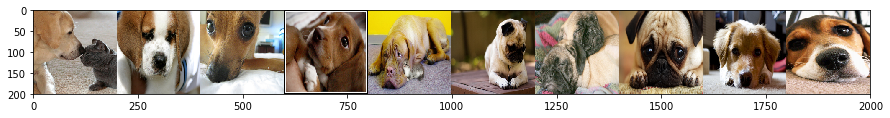

In [16]:
topmatch_img = mm_word.most_similar(pos_word=['dog'], target='image')
plt.figure(figsize=(15, 150))
plt.imshow(np.concatenate([read_image(img[0], (200, 200)) for img in topmatch_img], axis=1))
plt.grid(False)
topmatch_img

[('225230266', 0.588056206703186),
 ('427516072', 0.5857255458831787),
 ('300329930', 0.5827875137329102),
 ('2659155431', 0.5775504112243652),
 ('2286414410', 0.5739920139312744),
 ('2400359920', 0.5737611651420593),
 ('2668554304', 0.5730136036872864),
 ('1178052002', 0.5726193189620972),
 ('2155354777', 0.5692624449729919),
 ('482734907', 0.5669357776641846)]

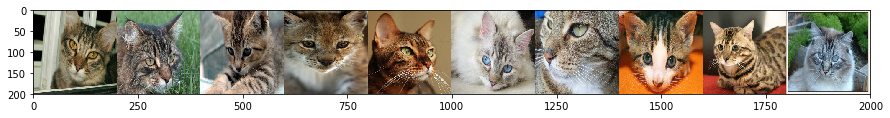

In [21]:
topmatch_img = mm_word.most_similar(pos_word=['cat'], target='image')
plt.figure(figsize=(15, 150))
plt.imshow(np.concatenate([read_image(img[0], (200, 200)) for img in topmatch_img], axis=1))
plt.grid(False)
topmatch_img